### 데이터분석 미션
- 과제1 : 남자/여자 수, 객실 등급별 수
- 과제2 : 연령대별 수 ( 10대 : OO명, 20대 : OO명, 30대 : OO명 )
- 과제3 : 남여별/객실등급별 생존자수를 그래프로 표현

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

### 데이터 다운로드 및 분석

In [3]:
df = pd.read_csv("./data/public_data/kaggle_titanic_train.csv")

In [4]:
df.head(10) # Pclass: 객실등급, 성별, 나이, 생존 여부

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.groupby("Sex").size()

Sex
female    314
male      577
dtype: int64

In [6]:
df.groupby("Pclass").size()

Pclass
1    216
2    184
3    491
dtype: int64

In [7]:
df.groupby(["Pclass", "Sex"]).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [8]:
df.groupby(['Sex', 'Pclass']).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [9]:
import math

In [10]:
# df.Age.dropna()
# Return Series without null values

In [11]:
# df.Age.dropna().apply(lambda x:str(x)[:1])

In [12]:
age_series = df.Age.dropna().apply(lambda age: math.floor(age/10)*10)

age_series.name = 'Age_Group'

In [13]:
age_series[:10]

0     20
1     30
2     20
3     30
4     30
6     50
7      0
8     20
9     10
10     0
Name: Age_Group, dtype: int64

In [14]:
#concat은 join 시켜준다.
df = pd.concat(
    [df, age_series],
    axis =1, 
)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0


In [15]:
df.Age_Group = df.Age_Group.fillna("확인불명")

In [17]:
df.Age_Group.head(10)

0      20
1      30
2      20
3      30
4      30
5    확인불명
6      50
7       0
8      20
9      10
Name: Age_Group, dtype: object

In [18]:
age_group_df = df.groupby("Age_Group").size()

In [19]:
age_group_df

Age_Group
0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     19
70.0      6
80.0      1
확인불명    177
dtype: int64

In [20]:
df.groupby("Age_Group").size()

Age_Group
0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     19
70.0      6
80.0      1
확인불명    177
dtype: int64

In [21]:
# df.agg : Aggregate using callable, string, dict, or list of string/callables

In [22]:
df.groupby("Pclass").agg({'Survived': 'mean'})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [23]:
df.groupby("Sex").agg({'Survived': 'mean'})

,Survived
Sex,
female,0.742038
male,0.188908


In [24]:
df.groupby("Sex").agg({'Survived': 'sum'})

,Survived
Sex,
female,233
male,109


In [25]:
df.groupby(["Sex", "Pclass"]).agg({'Survived': 'sum'})

Survived
Sex    Pclass          
female 1             91
       2             70
       3             72
male   1             45
       2             17
       3             47

In [26]:
df.groupby(["Pclass", "Sex"]).agg({'Survived': 'sum'})

Survived
Pclass Sex             
1      female        91
       male          45
2      female        70
       male          17
3      female        72
       male          47

In [27]:
233/314, 109/577

(0.7420382165605095, 0.18890814558058924)

#### pd.crosstab : Compute a simple cross-tabulation of two (or more) factors.

Signature: pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, dropna=True, normalize=False)
Docstring:
Compute a simple cross-tabulation of two (or more) factors. By default
computes a frequency table of the factors unless an array of values and an
aggregation function are passed

In [30]:
pd.crosstab(
    df.Sex,
    df.Pclass,
    margins = True, #True이면 all 합산을 보여준다. 
)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [31]:
pd.crosstab(
    df.Pclass,
    df.Sex,
    margins = True, #True이면 all 합산을 보여준다. 
)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


### df.pivot_table : Create a spreadsheet-style pivot table as a DataFrame
 Signature: df.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
Docstring:
Create a spreadsheet-style pivot table as a DataFrame. The levels in the
pivot table will be stored in MultiIndex objects (hierarchical indexes) on
the index and columns of the result DataFrame

In [32]:
df.pivot_table(
    "Survived",
    "Sex",
    "Pclass",
)
#ggfunc="mean" ( 생존률 ); ( 매출: SUM )

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [33]:
df.groupby(['Pclass', 'Sex']).size().unstack(1)
#Sex가 위로 온다 ->리스트 1번째는 Sex

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [36]:
temp_df = df.groupby(['Pclass', 'Sex']).size().unstack(0)
#unstack이 0이니 Pclass가 맨 위로 온다!
temp_df

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [40]:
# temp_df.sum(axis =1)
result_df = temp_df.div(temp_df.sum(axis=1), axis=0)
result_df
# 비율을 연산하는 과정                .sum() => .div()

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


In [41]:
# temp_df.div
# Floating division of dataframe and other, element-wise

### 데이터 시각화
- matplotlib.pyplot style

In [42]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

%matplotlib inline

In [43]:
plt.rcParams['figure.figsize'] = (12,8)

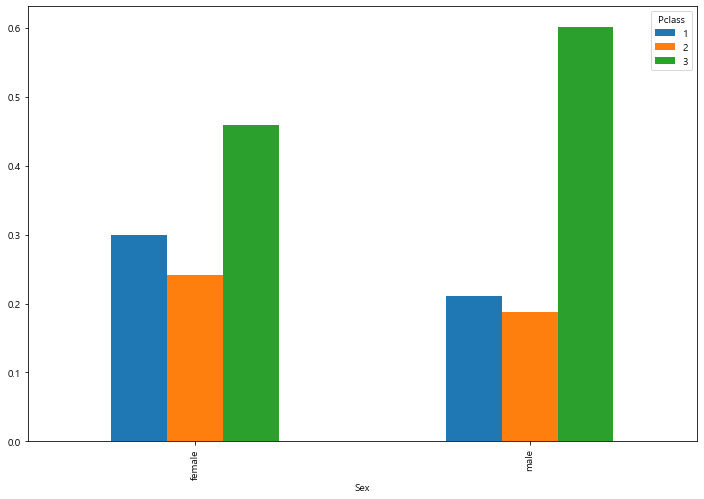

In [45]:
bar_plot = result_df.plot.bar();

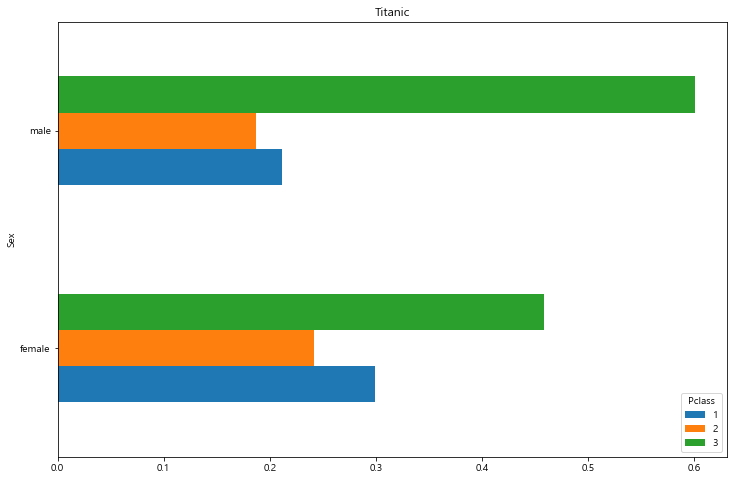

In [47]:
result_df.plot(kind = 'barh', title='Titanic');

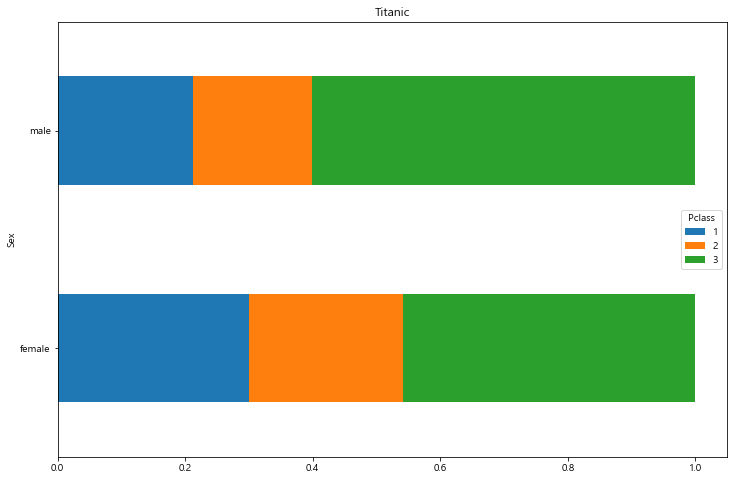

In [48]:
result_df.plot(kind = 'barh', title = "Titanic", stacked = True);

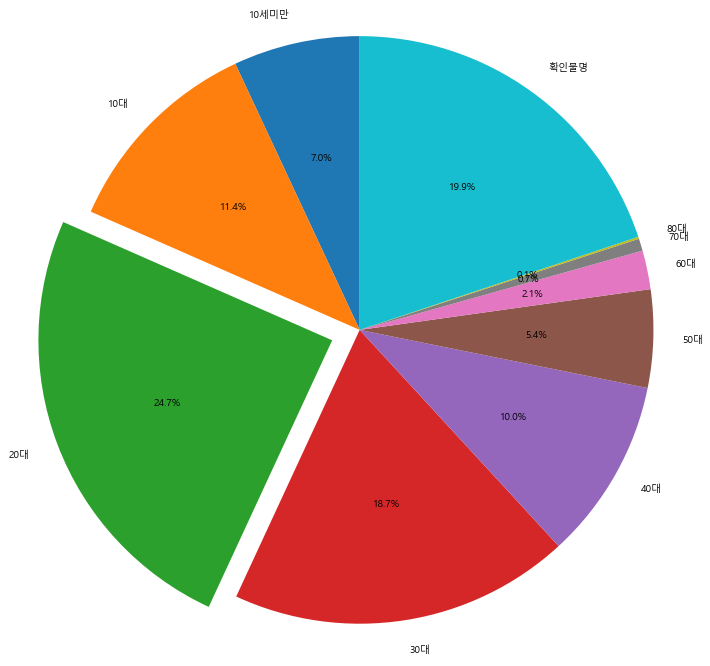

In [49]:
plt.rcParams['figure.figsize'] = (12,12)

labels = list(age_group_df.index)
labels = ['10세미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '확인불명']
sizes = list(age_group_df.values)

explode = (0,0,0.1,0,0,0,0,0,0,0)
#only explode 값이 있는 것이 떨어져 나온다.

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
#equal aspect ratio ensures that pie is drown as a circle

plt.show()

In [50]:
reset()

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


### seaborn style

In [51]:
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (12,8)

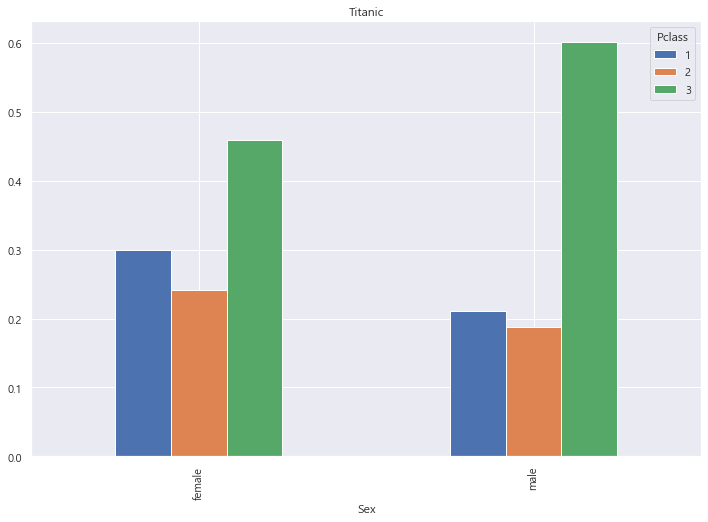

In [53]:
result_df.plot.bar(title='Titanic');

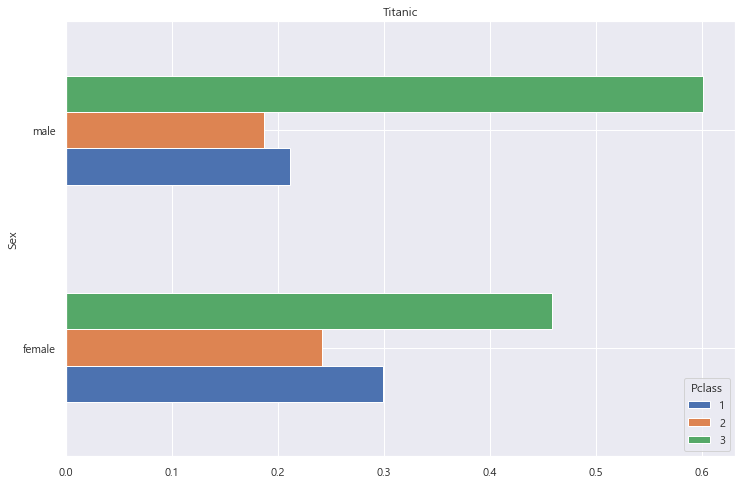

In [54]:
result_df.plot(kind='barh', title= 'Titanic');

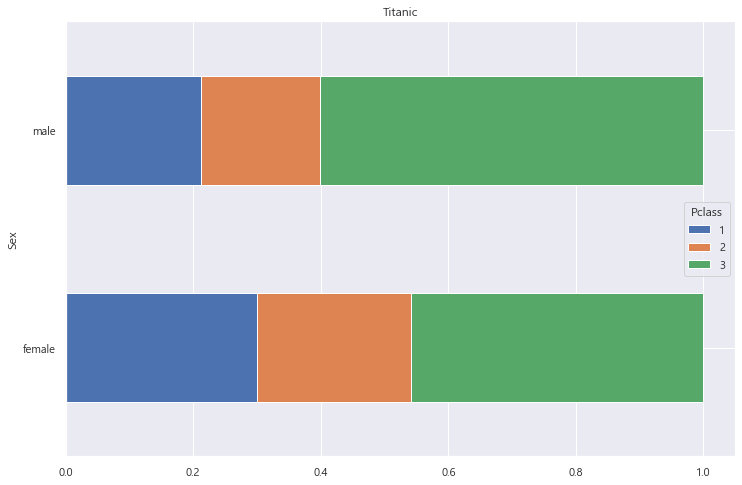

In [55]:
result_df.plot(kind='barh', title='Titanic', stacked = True);

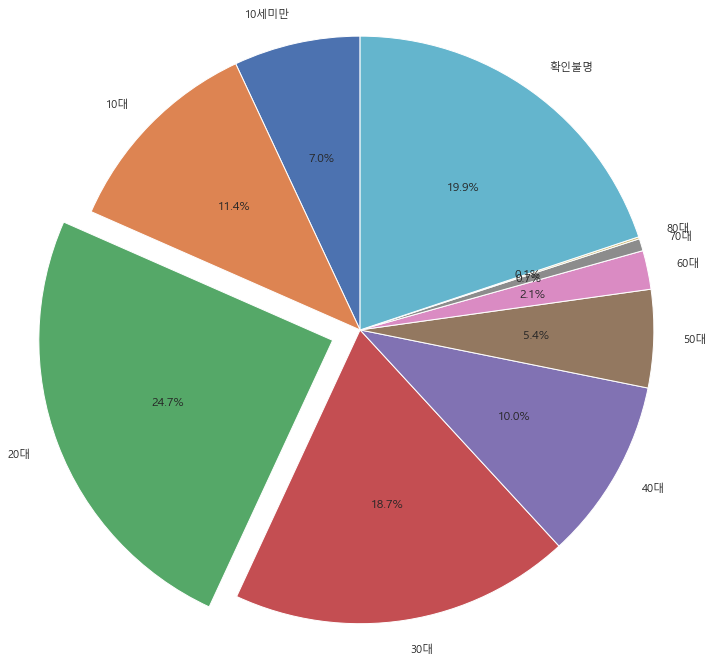

In [56]:
plt.rcParams['figure.figsize'] = (12,12)

labels = list(age_group_df.index)
labels = ['10세미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '확인불명']
sizes = list(age_group_df.values)
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 90)
ax1.axis('equal')

plt.show()